# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


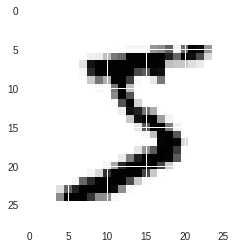

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation,LeakyReLU
model = Sequential()

 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))


model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.001))
model.add(Convolution2D(8, 3, 3))
model.add(LeakyReLU(alpha=0.001))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(16, 3, 3))
model.add(LeakyReLU(alpha=0.001))
model.add(Convolution2D(16, 3, 3))
model.add(LeakyReLU(alpha=0.001))
model.add(Convolution2D(16, 1))
model.add(LeakyReLU(alpha=0.05))
model.add(Convolution2D(10, 8))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         2312      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 24, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        1168      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 10, 10, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
60000/60000 [==============================] - 12s 203us/step - loss: 0.2019 - acc: 0.9383
Epoch 2/25
60000/60000 [==============================] - 11s 177us/step - loss: 0.0720 - acc: 0.9782
Epoch 3/25
60000/60000 [==============================] - 11s 177us/step - loss: 0.0543 - acc: 0.9835
Epoch 4/25
60000/60000 [==============================] - 11s 177us/step - loss: 0.0441 - acc: 0.9871
Epoch 5/25
60000/60000 [==============================] - 11s 177us/step - loss: 0.0376 - acc: 0.9886
Epoch 6/25
60000/60000 [==============================] - 11s 177us/step - loss: 0.0326 - acc: 0.9900
Epoch 7/25
60000/60000 [==============================] - 11s 177us/step - loss: 0.0292 - acc: 0.9911
Epoch 8/25
60000/60000 [==============================] - 11s 177us/step - loss: 0.0262 - acc: 0.9921
Epoch 9/25
60000/60000 [==============================] - 11s 177us/step - loss: 0.0233 - acc: 0.9929
Epoch 10/25
60000/60000 [=========

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.05860958639476682, 0.9899]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[8.5446765e-17 4.6272466e-25 4.4073576e-17 1.8210676e-14 2.1798093e-27
  4.6091000e-18 1.0085958e-32 1.0000000e+00 2.6025054e-22 6.1430120e-15]
 [7.3441371e-11 2.1247885e-10 1.0000000e+00 1.0572755e-21 2.4489869e-25
  1.8522284e-24 6.6881675e-17 2.6981978e-23 5.2117662e-19 9.7588902e-31]
 [3.0005887e-10 9.9999964e-01 2.0863524e-09 2.0655153e-11 1.3808429e-08
  2.1732898e-09 3.2606782e-09 3.8477415e-07 3.6305224e-08 7.9772910e-11]
 [1.0000000e+00 3.1498702e-16 1.4487448e-14 1.1465388e-18 1.1027299e-17
  5.5778046e-16 4.3440591e-11 1.2424649e-17 2.0193370e-17 3.9653250e-12]
 [1.2322489e-18 2.8774131e-15 1.5756841e-20 2.0874673e-19 9.9999928e-01
  1.2513062e-17 3.1514663e-16 1.2141988e-13 1.4881397e-19 7.4091776e-07]
 [9.9838637e-10 9.9999952e-01 3.3031225e-10 9.1950576e-14 1.4145999e-08
  4.4693017e-11 1.0346893e-11 4.0324980e-07 1.8313269e-08 1.5625243e-10]
 [8.7059989e-31 9.3082585e-18 3.6368725e-19 1.3146565e-21 9.9999988e-01
  2.6235238e-17 1.2900411e-20 3.9874593e-18 1.3725888e-10 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_9'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored